In [25]:
#import necessary pacakges
from skimage.metrics import structural_similarity
import imutils
import cv2
import requests
from PIL import Image

In [26]:
# Open Image and display
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg',stream=True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream = True).raw)

In [27]:
# The file format of the source file. 
print("Original image format: ",original.format)
print("Tampered image format: ",tampered.format)

#Image size, in pixels. The size is given as a 2-tuple (width,height).
print("Original image format: ",original.size)
print("Tampered image format: ",tampered.size)

Original image format:  JPEG
Tampered image format:  PNG
Original image format:  (1200, 800)
Tampered image format:  (282, 179)


In [28]:
#Resize Image
original = original.resize((250,160))
print(original.size)
original.save('pan_card_tampering/image/original.png')
tampered = tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/image/tampered.png')

(250, 160)
(250, 160)


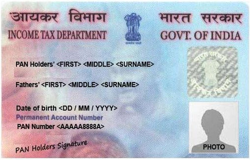

In [29]:
original

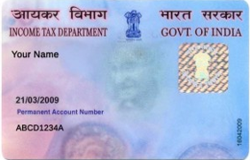

In [30]:
tampered

In [35]:
#load the two input images

original = cv2.imread('pan_card_tampering/image/original.png')
tampered = cv2.imread('pan_card_tampering/image/tampered.png')

# Check if images are loaded successfully
if original is not None and tampered is not None:
    original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    tampered_gray = cv2.cvtColor(tampered, cv2.COLOR_BGR2GRAY)
else:
    print("Error loading images.")

In [44]:
# Compute the Structural similarity Index between the two images.

(score,diff) = structural_similarity(original_gray,tampered_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.31686135690489126


In [52]:
#Calculating threshold and contours
thresh = cv2.threshold(diff, 0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [53]:
# Loop over the contours
for c in cnts:
    #Applying contours on image
    (x,y,w,h) = cv2.boundingRect(c)
    cv2.rectangle(original,(x,y),(x+w,y+h),(0,0,225),2)
    cv2.rectangle(tampered,(x,y),(x+w,y+h),(0,0,225),2)

Original Format image


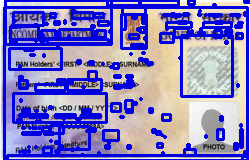

In [54]:
# Display the original Image with contour
print('Original Format image')
Image.fromarray(original)

Tampered Format image


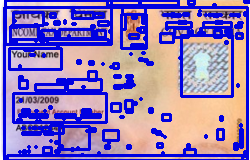

In [55]:
# Display the tampered Image with contour
print('Tampered Format image')
Image.fromarray(tampered)

Difference Format image


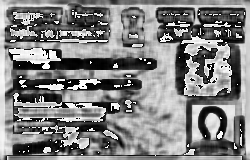

In [56]:
# Display the Difference Image with contour
print('Difference Format image')
Image.fromarray(diff)

Threshold Format image


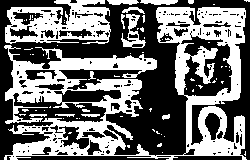

In [57]:
# Display the Threshold Image with contour
print('Threshold Format image')
Image.fromarray(thresh)

### Summary

The exploration of structural similarity in images has proven instrumental in discerning disparities or resemblances in their shapes. Additionally, the determination of optimal thresholds and subsequent contour identification in grayscale binary images has facilitated in-depth shape analysis and recognition. With a computed Structural Similarity Index (SSIM) of approximately 31.2%, it is inferred that the provided image is likely forged or tampered.

To enhance our findings, we employed visualization techniques, presenting the images with overlaid contours, highlighting differences, and showcasing threshold variations. This comprehensive approach aids in a nuanced understanding of the disparities and similarities between the images.

### Scope

This project holds significant applicability across diverse organizations requiring user verification through provided IDs. Whether in the realm of customer onboarding or internal processes, this tool enables the swift determination of ID authenticity. Its utility extends to various ID types, such as Aadhar cards, voter IDs, and others, making it a versatile solution for bolstering security measures and ensuring the integrity of provided identification documents.